In [1]:
!pip install matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [3]:
df = pd.read_csv('epa-sea-level.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      144 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   31 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


In [5]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,144.000000,134.000000,134.000000,134.000000,31.000000
mean,1951.500000,3.646404,3.201551,4.091256,8.120275
std,41.713307,2.477596,2.657303,2.302755,1.125552
min,1880.000000,-0.440945,-1.346457,0.464567,6.308803
25%,1915.750000,1.632874,1.078740,2.240157,7.197893
50%,1951.500000,3.312992,2.915354,3.710630,7.960706
75%,1987.250000,5.587598,5.329724,5.845472,9.127353
max,2023.000000,9.244094,8.917323,9.570866,10.203904


In [6]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,2023,NaN,NaN,NaN,10.203904
1,2022,NaN,NaN,NaN,9.974711
2,2021,NaN,NaN,NaN,9.886688
3,2020,NaN,NaN,NaN,9.699874
4,2019,NaN,NaN,NaN,9.594329


In [7]:
print(df.isnull().sum())

Year                          0
CSIRO Adjusted Sea Level     10
Lower Error Bound            10
Upper Error Bound            10
NOAA Adjusted Sea Level     113
dtype: int64


In [8]:
# Create a cleaned dataframe by dropping rows with null values in the critical column
df_cleaned = df.dropna(subset=['CSIRO Adjusted Sea Level'])

# Verify that the nulls are gone from that column in the new dataframe
print("Null values after cleaning:")
print(df_cleaned.isnull().sum())

Null values after cleaning:
Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64


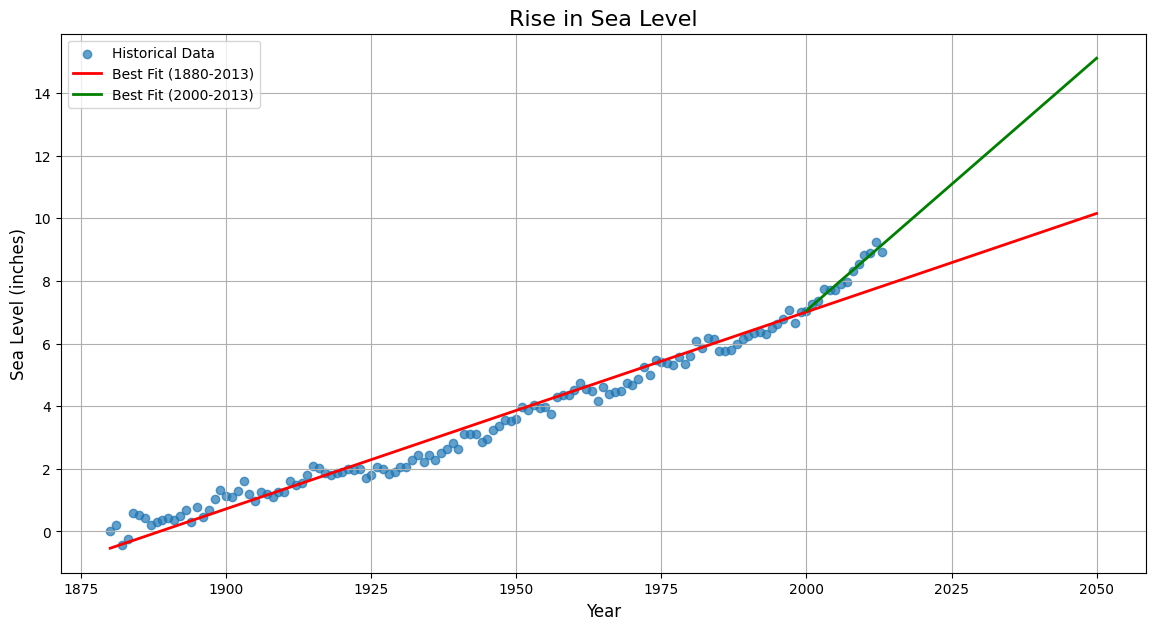

In [9]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Create scatter plot of the cleaned historical data
ax.scatter(df_cleaned['Year'], df_cleaned['CSIRO Adjusted Sea Level'], label='Historical Data', alpha=0.7)

# Create the first line of best fit (using all data from 1880-2013)
# Perform linear regression
res_all = linregress(df_cleaned['Year'], df_cleaned['CSIRO Adjusted Sea Level'])

# Create a range of years for the prediction line (from min year to 2050)
x_pred_all = pd.Series(range(df_cleaned['Year'].min(), 2051))
y_pred_all = res_all.slope * x_pred_all + res_all.intercept

# Plot the line
ax.plot(x_pred_all, y_pred_all, 'r', linewidth=2, label='Best Fit (1880-2013)')

# Create the second line of best fit (using data from year 2000 onwards)
# Filter for recent data
df_recent = df_cleaned[df_cleaned['Year'] >= 2000]
# Perform linear regression on the recent data
res_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
# Create a range of years for the second prediction line (from 2000 to 2050)
x_pred_recent = pd.Series(range(2000, 2051))
y_pred_recent = res_recent.slope * x_pred_recent + res_recent.intercept
# Plot the second line
ax.plot(x_pred_recent, y_pred_recent, 'g', linewidth=2, label='Best Fit (2000-2013)')

# Set labels, title, and legend for clarity
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sea Level (inches)', fontsize=12)
ax.set_title('Rise in Sea Level', fontsize=16)
ax.legend()
ax.grid(True)

# Show the plot
plt.show()